In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
import numpy as np

def load_images(folder_path):
    images = []
    labels = []
    for label, class_folder in enumerate(['Cat', 'Dog']):
        class_path = os.path.join(folder_path, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (500, 500))  # Resize the image to a common size
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training data
train_folder = '/content/drive/MyDrive/Dog and Cat Dataset/Train Images'
X_train, y_train = load_images(train_folder)

# Load testing data
test_folder = '/content/drive/MyDrive/Dog and Cat Dataset/Test Images'
X_test, y_test = load_images(test_folder)


In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)    #Preprocess the Data
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
from sklearn import svm

# Create an SVM model
svm_model = svm.SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [6]:
accuracy = svm_model.score(X_test, y_test)     #Evaluate the Model
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.535


In [7]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Compute precision, recall, f1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Print the results
for class_label in range(len(precision)):
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}, F1-Score: {f1_score[class_label]}, Support: {support[class_label]}")

# Overall metrics (micro-averaged)
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("\nMicro-averaged Metrics:")
print(f"Precision: {micro_precision}, Recall: {micro_recall}, F1-Score: {micro_f1_score}")


Class 0 - Precision: 0.5299145299145299, Recall: 0.62, F1-Score: 0.5714285714285714, Support: 100
Class 1 - Precision: 0.5421686746987951, Recall: 0.45, F1-Score: 0.4918032786885245, Support: 100

Micro-averaged Metrics:
Precision: 0.535, Recall: 0.535, F1-Score: 0.535


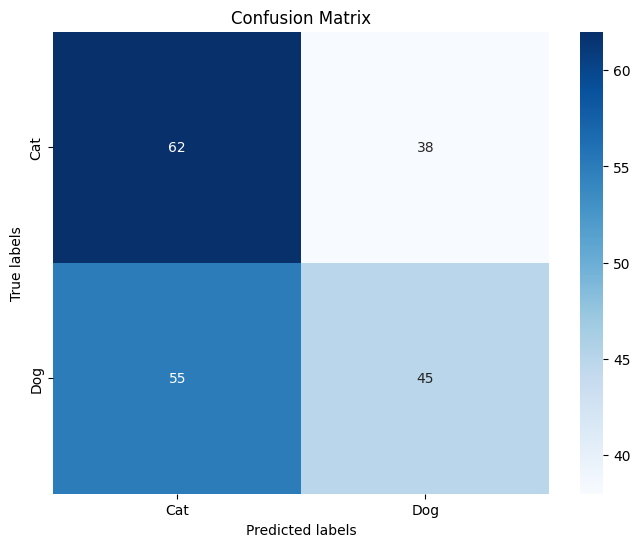

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()